<center>

# Group-10: **Homework-1**

</center>

<h3>Introduction: </br> </h3>
Perceptron is one of the simplest Artificial neural network architectures. It is the simplest type of feedforward neural network, consisting of a single layer of input nodes that are fully connected to a layer of output nodes. It can learn the linearly separable patterns.

<h3>About the Dataset: </br></h3>

It consists of 150 observations of iris flowers, including the sepal and petal length and width for each flower, as well as the species of the flower.

The variables are:
* **sepal_length:** Sepal length, in centimeters
* **sepal_width:** Sepal width, in centimeters
* **petal_length:** Petal length, in centimeters
* **petal_width:** Petal width, in centimeters
* **species:** Iris Setosa, Versicolor, or Virginica, used as the target.

<h2>Question 1 : </br></h2>

We mentioned that perceptron converges if the data is linearly separable. Try sklearn perceptron model for versicolor and virginica, with sepal length and petal length. What do you
observe?


<h3>Aim: </br> </h3>
To build a perceptron model for versicolor and virginica with two columns sepal lenth and petal length and observe if this data is linearly separable.

<h3>Methodology: </br></h3>

**1. Importing necessary packages**

In [3]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import a function for plotting decision boudaries
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

**2. Load the Iris dataset into a Pandas DataFrame**

In [4]:
# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("iris_dataset.csv")

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There are no null values in the dataset. Hence, we can proceed with further analysis.

In [7]:
df.shape

(150, 5)

In [8]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

From the above count, we can see that there are 50 samples for each type of the flower.

**3. Graphical representation of the count of Species in the data**

<Axes: xlabel='species', ylabel='count'>

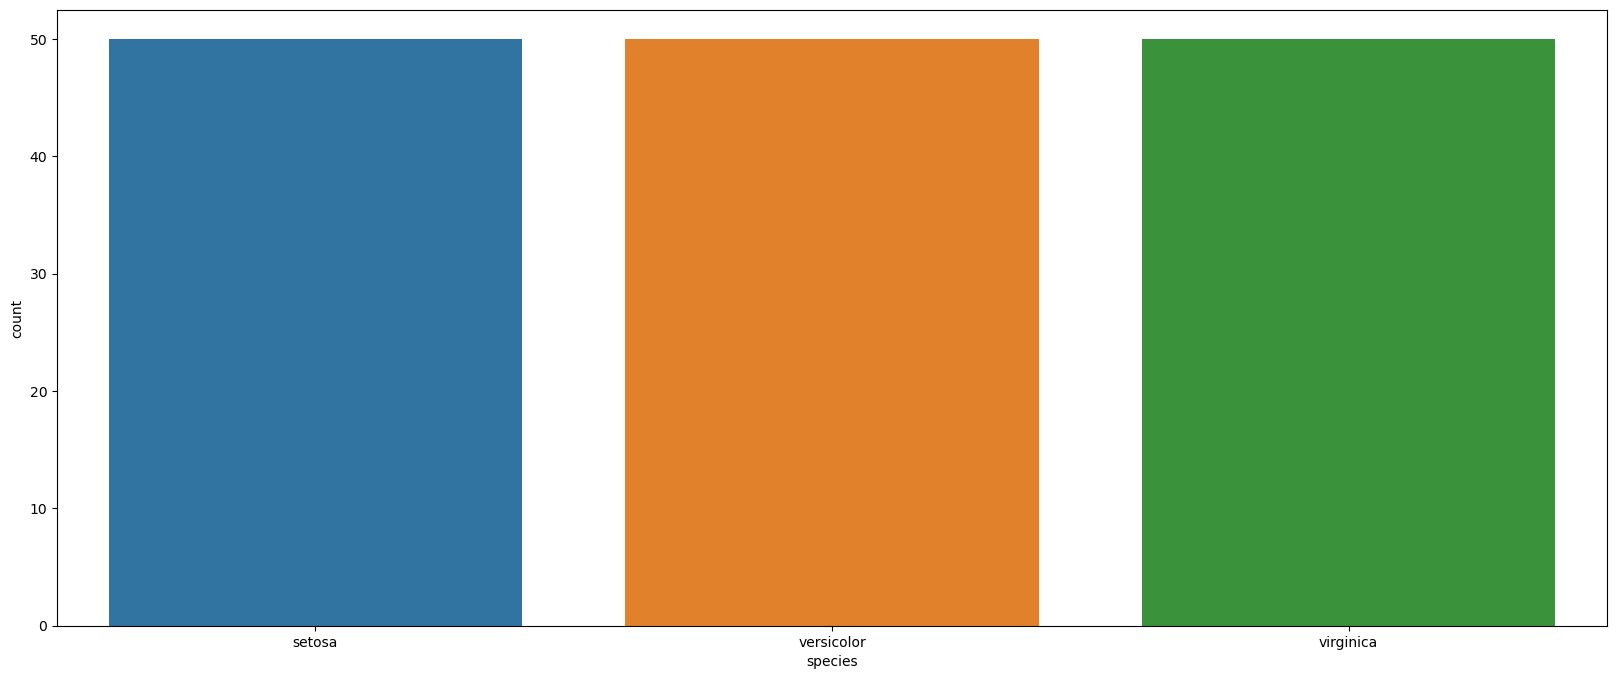

In [9]:
import seaborn as sns
plt.figure(figsize = (20,8))
sns.countplot(df, x = 'species')

**4. Box-plot for all the features in the dataset to check for outliers**

Text(0.5, 1.0, 'Boxplot for Petal Width')

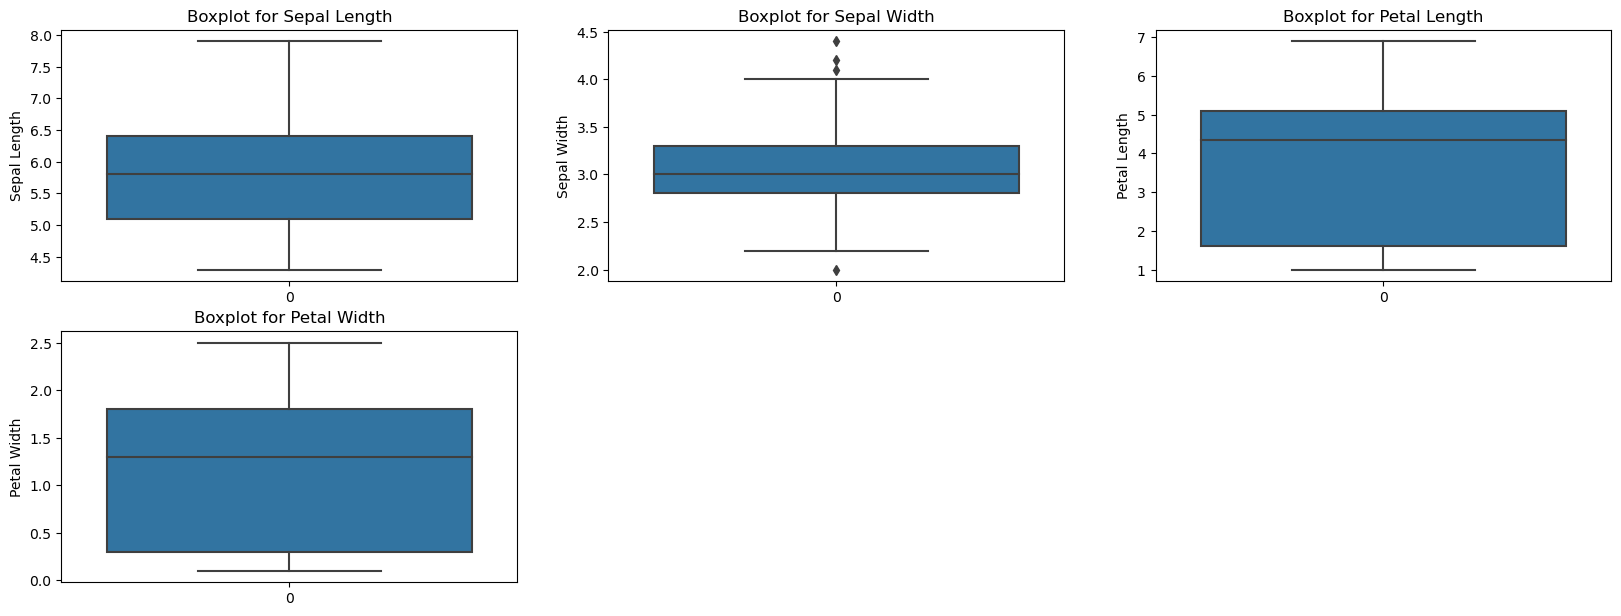

In [11]:
plt.figure(figsize = (20,15))
plt.tight_layout(pad = 3.0)
plt.subplot(4,3,1)
sns.boxplot(df['sepal_length'])
plt.ylabel('Sepal Length')
plt.title('Boxplot for Sepal Length')
plt.subplot(4,3,2)
sns.boxplot(df['sepal_width'])
plt.ylabel('Sepal Width')
plt.title('Boxplot for Sepal Width')
plt.subplot(4,3,3)
sns.boxplot(df['petal_length'])
plt.ylabel('Petal Length')
plt.title('Boxplot for Petal Length')
plt.subplot(4,3,4)
sns.boxplot(df['petal_width'])
plt.ylabel('Petal Width')
plt.title('Boxplot for Petal Width')


We can see some outliers in the feature Sepal width.

**5. Scatter plot for between the species of the data**

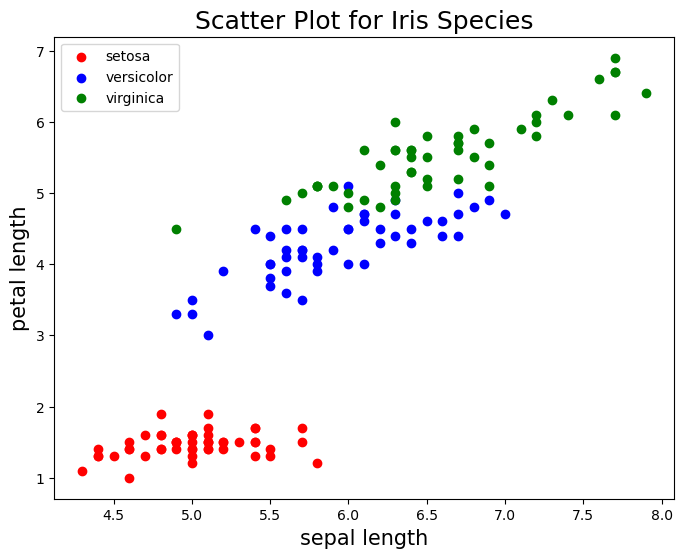

In [12]:
df1 = df[df.species=="setosa"]
df2 = df[df.species=="versicolor"]
df3 = df[df.species=="virginica"]

plt.figure(figsize = (8, 6))
plt.scatter(df1.sepal_length, df1.petal_length, color="red", label="setosa")
plt.scatter(df2.sepal_length, df2.petal_length, color="blue", label="versicolor")
plt.scatter(df3.sepal_length, df3.petal_length, color="green", label="virginica")
plt.title("Scatter Plot for Iris Species", fontsize = 18)
plt.xlabel("sepal length", fontsize=15)
plt.ylabel("petal length", fontsize=15)
plt.legend();

From the above scatter plot, we can see that the two feautures (sepal length and petal length), are not linearly seperable for the two species versicolor and virginica. Still let's apply perceptron model for the two features of these two species.

In [13]:
# We need only versicolor and virginica which are the last 100 rows
data= df.iloc[50:150]
data

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


The perceptron can take any number of inputs (features), but for simplicity we will consider two inputs: "sepal length" and "petal length".


In [14]:
X = data[["sepal_length", "petal_length"]]

X

,sepal_length,petal_length
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
53,5.5,4.0
54,6.5,4.6
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


We will also convert the labels "versicolor" and "virginica" to numerical values: "versicolor" to -1 and "virginica" to +1.

In [15]:
# Store the labels in y
y = data['species']

# We can leave the original labels and use sklearn perceptron,
# but to use mlxtend for plotting we need to encode the labels versicolor = -1, virginica = 1

y = np.where(y == 'versicolor', -1, 1)

y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

<h3>Analysis: Sklearn Perceptron </h3> 

In [16]:
from sklearn.linear_model import Perceptron

**1. Fitting the perceptron model**

In [17]:
# Instantiate one instance of the Perceptron class
clf = Perceptron()

# Fit the model to the training data
clf.fit(X, y)

Perceptron()

**2. Predicting the outcome variable y**

In [18]:
# Compute predict labels on X
y_pred = clf.predict(X)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1])

In [19]:
# Actual labels
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [20]:
# Compare actual and predicted labels
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False  True  True False  True  True  True False False  True
  True False  True  True False False  True False  True False  True False
  True False  True  True False False  True False  True  True  True False
 False False  True  True]


As versicolor and virginica are not linearly sepearable we can see a lot of predicted values does not match the actual value. This means that our perceptron model in classifying versicolor and virginica is not an ideal model.

In [21]:
# calculating the coefficient which are the weights
clf.coef_   

array([[-56.5,  74.9]])

In [22]:
#calculating the intercept term which is the bias
clf.intercept_  

array([-38.])

In [23]:
#converting to array
X.to_numpy()

array([[7. , 4.7],
       [6.4, 4.5],
       [6.9, 4.9],
       [5.5, 4. ],
       [6.5, 4.6],
       [5.7, 4.5],
       [6.3, 4.7],
       [4.9, 3.3],
       [6.6, 4.6],
       [5.2, 3.9],
       [5. , 3.5],
       [5.9, 4.2],
       [6. , 4. ],
       [6.1, 4.7],
       [5.6, 3.6],
       [6.7, 4.4],
       [5.6, 4.5],
       [5.8, 4.1],
       [6.2, 4.5],
       [5.6, 3.9],
       [5.9, 4.8],
       [6.1, 4. ],
       [6.3, 4.9],
       [6.1, 4.7],
       [6.4, 4.3],
       [6.6, 4.4],
       [6.8, 4.8],
       [6.7, 5. ],
       [6. , 4.5],
       [5.7, 3.5],
       [5.5, 3.8],
       [5.5, 3.7],
       [5.8, 3.9],
       [6. , 5.1],
       [5.4, 4.5],
       [6. , 4.5],
       [6.7, 4.7],
       [6.3, 4.4],
       [5.6, 4.1],
       [5.5, 4. ],
       [5.5, 4.4],
       [6.1, 4.6],
       [5.8, 4. ],
       [5. , 3.3],
       [5.6, 4.2],
       [5.7, 4.2],
       [5.7, 4.2],
       [6.2, 4.3],
       [5.1, 3. ],
       [5.7, 4.1],
       [6.3, 6. ],
       [5.8, 5.1],
       [7.1,

**3. Plotting the classification from the perceptron model**

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


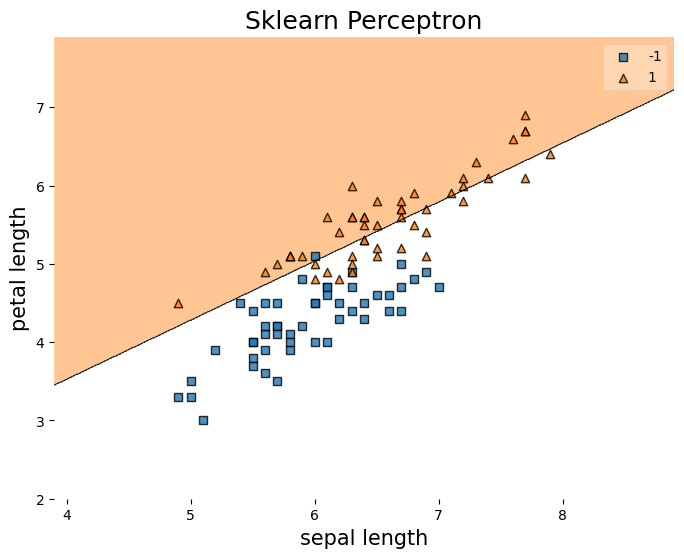

In [24]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X.to_numpy(), y, clf = clf)
plt.title("Sklearn Perceptron", fontsize = 18)
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("petal length", fontsize = 15);

Also, from the above plot, its clear that the two species versicolor and virginica are not linearly seperable. A misclassification occurred due to this reason.

In [25]:
# We can use this classifier to predict the species of a flower with measurements 6 (sepal length) and 5 (petal length.)
# Obviously from the graph, the label should be -1. 

clf.predict([[6, 5]])

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


array([-1])

<h3> Conclusion 1:</h3> </br>
From the above results and the plot, we can clearly say that versicolor and virginica are not linearly sepearable and can see a lot of predicted values does not match the actual value. This means that our perceptron model in classifying versicolor and virginica is not an ideal model.

<h2>Question 2 : </br></h2>
We created My_Perceptron class for only 2 inputs. Extend this code for 3 inputs. Investigate the iris data set and choose 3 features to classify setosa and versicolor using your code. Notice that you cannot easily plot the decision boundary now since the data is 3-dimensional, but you can still compare the actual and the predicted labels to see how your algorithm is performing.

<h3>Aim: </br> </h3>

To build a perceptron model using My_Perceptron class to classify setosa and versicolor using 3 features from the iris dataset and check the performance of the model.

<h3>Analysis: </br> </h3>

The perceptron class we will create will store a learning rate  𝜂
 , the number of iterations (epochs)  𝑇
  when training, the weights  𝑤1
 ,  𝑤2 , w3
  and bias  𝑏
 , and the error incured during training at each iteration. This class will also contain input method, fit method, and predict method.

**1. Selecting Setosa and Versicolor species from the dataset.**

In [26]:
# We need only setosa and versicolor which are the first 100 rows

data2 = df.iloc[:100]
data2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [27]:
X2 = data2[["sepal_length", "sepal_width" , "petal_length"]].to_numpy()

X2

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

In [28]:
# Store the labels in y2
y2 = data2['species']

# We can leave the original labels and use sklearn perceptron,
# but to use mlxtend for plotting we need to encode the labels setosa = -1, versicolor = 1

y2 = np.where(y2 == 'setosa', -1, 1)
y2

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

**2. Defining a MyPerceptron() that helps in classifying both the classes with three features.**

In [29]:
class MyPerceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def fit(self, X2, y2):
        self.w1 = np.random.rand(1) # for feautre 1
        self.w2 = np.random.rand(1) # for feauture 2
        self.w3 = np.random.rand(1) # for feauture 3
        self.b = np.random.rand(1) # bias
        
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X2, y2):
                update = self.eta * (self.predict(xi) - yi)
                self.w1 = self.w1 - update*xi[0]
                self.w2 = self.w2 - update*xi[1]
                self.w3 = self.w3 - update*xi[2]
                self.b = self.b - update
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
            
        return self
    
    def weighted_sum(self, x):
        self.w = np.array([self.w1, self.w2, self.w3])
        return np.dot(x, self.w) + self.b
    
    def predict(self, x):
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)

In [30]:
np.random.rand(1)

array([0.96748444])

**3. Fitting the model using the Myperceptron()**

In [31]:
# Instantiate one instance of My_Perceptron class
my_clf = MyPerceptron()

# Call the fit method 
my_clf.fit(X2, y2)

**4. Predicitng the outcome variable y**

In [32]:
# Predict labels on X
y_pred = my_clf.predict(X2)
y_pred

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],

In [33]:
y2

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [34]:
y_pred = y_pred.reshape(100)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

**5. Comparing the y-actual and y-predicted values, to find out if there are any misclassifications**

In [35]:
# Compare actual and predicted labels
print(y2 == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


So, from above scenario, we can see a 100% accuracy as all the predicted values matches with the actual values. Here for all the three features, both the species setosa and versicolor are linearly seperable. So perceptron is a good model in this case.

In [36]:
# calculating the coefficient which are the weights w1,w2 and w3
my_clf.w  

array([[-0.66945363],
       [-3.69198865],
       [ 6.10506376]])

In [37]:
# calculating the intercept which is the bias
my_clf.b

array([-0.3478971])

plt.figure(figsize = (8, 6))
plot_decision_regions(X, y, clf = my_clf)
plt.title("My Perceptron Classifier", fontsize = 18)
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("petal length", fontsize = 15);

In this case where we have more than 2 features, we cannot easily plot the decision boundary. Since, the data is 3-dimensional, we would require to provide filler values in this case. We cannot plot it using 2D plotting techniques.

<h3> Conclusion 2:</h3> </br>
From the above results from the MyPerceptron(), after comparing the y-actual and y-predicted values, we can clearly see that setosa and versicolor are linearly sepearable. As all the precicted and actual values matched. This means that our perceptron model is an ideal model.

<h2>Question 3 : </br></h2>
Try to generalize My_Perceptron code so it could be used for any number of inputs. (Hint: Recall, that for a list w we can use w[-1] and w[:-1] to access the last value in the list and all the values expect the very last value. Also, use np.dot, NumPy dot product, to compute the pre-activation value of z.)

<h3>Aim: </br> </h3>

To create a generalized My_Perceptron() custom class for the perceptron algorithm to handle any number of inputs.

<h3>Analysis: </br> </h3>
The perceptron class we will create will store a learning rate 𝜂 , the number of iterations (epochs) 𝑇 when training, the weights will be a vector so that it works for any number of input and bias 𝑏 , and the error incured during training at each iteration. This class will also contain input method, fit method, and predict method.

In [38]:
X3 = data2[["sepal_length", "sepal_width" , "petal_length", "petal_width"]].to_numpy()

X3

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [39]:
# Store the labels in y
y3 = data2['species']

# We can leave the original labels and use sklearn perceptron,
# but to use mlxtend for plotting we need to encode the labels setosa = -1, versicolor = 1

y3 = np.where(y3 == 'setosa', -1, 1)

In [40]:
y3

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [41]:
import numpy as np

class MyPerceptron (object):
    def __init__(self, eta=0.5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def fit(self, X3, y3):
        self.weights = np.random.rand(X3.shape[1] + 1)  
        # Initiazing all the weights with X.shape[1], as X.shape returns a tuple  with (rows,columns) and here we just need 
        # the rows that defines the total number of feautures.So it returns the number of features in the input data, 
        # and an extra weight is added for the bias term.
        self.errors = []
        
        for _ in range(self.epochs):
            num_errors = 0
            for xi, yi in zip(X3, y3):
                update = self.eta * (self.predict(xi) - yi)
                self.weights[:-1] = self.weights[:-1] - update * xi #updates the weights for each feature
                self.weights[-1] = self.weights[-1] - update  # Updating the bias
                num_errors = num_errors + int(update != 0)
            self.errors.append(num_errors)
            if num_errors == 0:
                break
            
        return self
    
    def calculate_weighted_sum(self, x):
        return np.dot(x, self.weights[:-1]) + self.weights[-1]  # Dot product of input and weights + bias
    
    def predict(self, x):
        weighted_sum = self.calculate_weighted_sum(x)
        return np.where(weighted_sum > 0.0, 1, -1)


In [42]:
np.random.rand(1)

array([0.65001672])

In [43]:
# Instantiate one instance of My_Perceptron class
my_clf = MyPerceptron()

# Call the fit method 
my_clf.fit(X3, y3)

In [44]:
# Predict labels on X
y_pred = my_clf.predict(X3)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [45]:
y3

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [46]:
y_pred = y_pred.reshape(100)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [47]:
# Compare actual and predicted labels
print(y3 == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


So, from the above comparison we can see that out new model for n number of feautures work fine when we are considering that we have 4 feautures. In the result all our predicted values matches with the actual value. Therefore, it seems that if there are multiple features this model is going to work fine.

In [48]:
#prints the coefficients (weights w1,w2,w3,w4) and the intercept (bias)
my_clf.weights     

array([-1.13581963, -3.19173641,  5.29284966,  2.91671859, -0.32539377])

In our code, weights and bias both are getting updated iteratively. That is why the first 4 values are weights w1, w2, w3, w4 and last value is the bias. 

<h3> Conclusion 3:</h3> </br>
We defined a generalized MyPerceptron() class that works for multiple input features. From the results obtained from this class, after comparing the y-actual and y-predicted values, we can clearly see that setosa and versicolor are linearly sepearable, as all the precicted and actual values matched. This means that our perceptron model is an ideal model.</br>
Also the generalized class created worked for multiple input features sucessfully.

**A perceptron is a binary classification model and works perfectly without misclassifications when the classes are linearly separable.**